<a href="https://colab.research.google.com/github/VegetaSan1/Machine-Learning-Projects/blob/main/LOAN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
test=pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
train.info()
print('*'*100)
print('*'*100)
print('*'*100)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB
****************************************************************************************************
***********

In [ ]:
train.describe()


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
test.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,357.000000,367.000000,367.000000,362.000000,361.000000,338.000000
mean,0.829132,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,1.071302,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000
25%,0.000000,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,2.000000,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,3.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
train['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [ ]:
print(train['Gender'].unique())
print(train['Married'].unique())
print(train['Education'].unique())
print(train['Self_Employed'].unique())
print(train['Property_Area'].unique())
print(train['Loan_Status'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


In [ ]:
train['Gender']=train['Gender'].fillna('Male')
train['Married']=train['Married'].fillna('Yes')
train['Self_Employed']=train['Self_Employed'].fillna('Yes')

In [ ]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mean())

In [ ]:
print(train['Gender'].unique())
print(train['Married'].unique())
print(train['Self_Employed'].unique())

['Male' 'Female']
['No' 'Yes']
['No' 'Yes']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Gender']=le.fit_transform(train['Gender'])

In [ ]:
train['Married']=le.fit_transform(train['Married'])

In [ ]:
train['Education']=le.fit_transform(train['Education'])


In [ ]:
train['Self_Employed']=le.fit_transform(train['Self_Employed'])

In [ ]:
train['Property_Area']=le.fit_transform(train['Property_Area'])

In [ ]:
train['Loan_Status']=le.fit_transform(train['Loan_Status'])

In [ ]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0.0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3.0,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1.0,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2.0,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [ ]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())

In [ ]:
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())

In [ ]:
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mean())

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
print(train['Gender'].unique())
print(train['Married'].unique())
print(train['Education'].unique())
print(train['Self_Employed'].unique())
print(train['Property_Area'].unique())
print(train['Loan_Status'].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[2 0 1]
[1 0]


In [ ]:
print(test['Gender'].unique())
print(test['Married'].unique())
print(test['Education'].unique())
print(test['Self_Employed'].unique())
print(test['Property_Area'].unique())


['Male' 'Female' nan]
['Yes' 'No']
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Semiurban' 'Rural']


In [ ]:
test['Gender']=test['Gender'].fillna('Male')
test['Self_Employed']=test['Self_Employed'].fillna('Yes')

In [ ]:
print(test['Gender'].unique())
print(test['Self_Employed'].unique())

['Male' 'Female']
['No' 'Yes']


In [ ]:
test['Gender']=le.fit_transform(test['Gender'])
test['Married']=le.fit_transform(test['Married'])
test['Education']=le.fit_transform(test['Education'])
test['Self_Employed']=le.fit_transform(test['Self_Employed'])
test['Property_Area']=le.fit_transform(test['Property_Area'])

In [ ]:
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())

In [ ]:
 test['Credit_History'] = test['Credit_History'].fillna(0)

In [ ]:
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())

In [ ]:
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mean())

In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

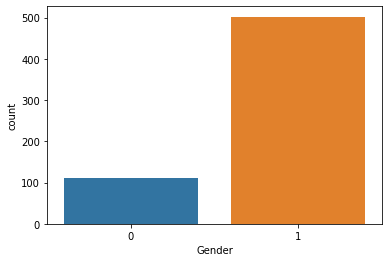

In [ ]:
sns.countplot(x='Gender', data=train)

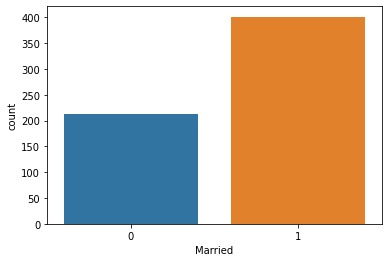

In [ ]:
sns.countplot(x='Married', data=train)

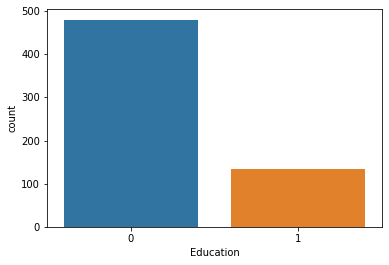

In [ ]:
sns.countplot(x='Education', data=train)

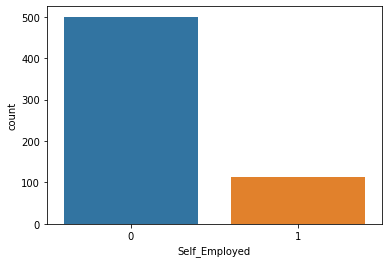

In [ ]:
sns.countplot(x='Self_Employed', data=train)

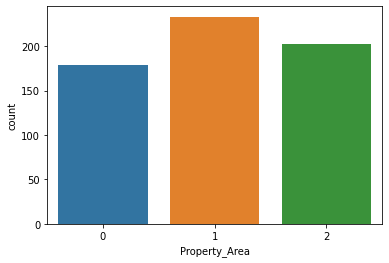

In [ ]:
sns.countplot(x='Property_Area', data=train)

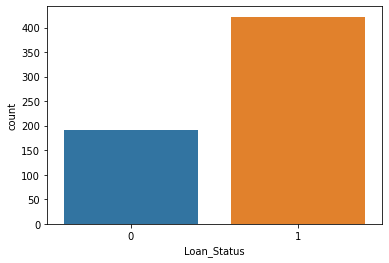

In [ ]:
sns.countplot(x='Loan_Status', data=train)

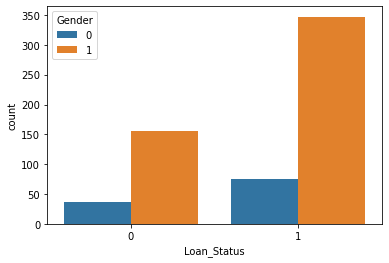

In [ ]:
sns.countplot(x='Loan_Status', data=train, hue='Gender')

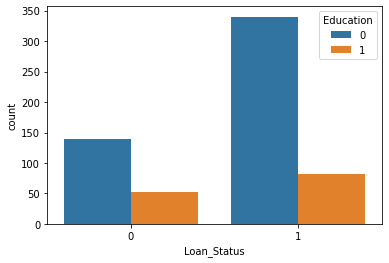

In [ ]:
sns.countplot(x='Loan_Status', data=train, hue='Education')

In [ ]:
cor=train.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.173258,0.045364,-0.023918,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.339653,0.012304,-0.021584,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.173258,0.339653,1.000000,0.058317,0.039928,0.118358,0.027171,0.160767,-0.098048,-0.046995,0.006750,0.006685
Education,0.045364,0.012304,0.058317,1.000000,-0.019059,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.023918,-0.021584,0.039928,-0.019059,1.000000,0.121356,0.028834,0.112118,-0.040244,0.035220,-0.022732,0.005857
ApplicantIncome,0.058809,0.051708,0.118358,-0.140760,0.121356,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.027171,-0.062290,0.028834,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.160767,-0.166998,0.112118,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.098048,-0.077242,-0.040244,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.046995,-0.077936,0.035220,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


In [ ]:
del train['Loan_ID']      
del train['CoapplicantIncome']      
del test['Loan_ID']      
del test['CoapplicantIncome']

In [ ]:
train['Property_Area'].isnull().sum()

0

In [ ]:
train['Property_Area']

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 614, dtype: int64

In [ ]:
train['Self_Employed']

0      0
1      0
2      1
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Self_Employed, Length: 614, dtype: int64

In [ ]:
train['Married']

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 614, dtype: int64

In [ ]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,146.412162,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,71.000000,360.0,1.0,0,1
610,1,1,3.0,0,0,4106,40.000000,180.0,1.0,0,1
611,1,1,1.0,0,0,8072,253.000000,360.0,1.0,2,1
612,1,1,2.0,0,0,7583,187.000000,360.0,1.0,2,1


In [ ]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0.0,0,0,5720,110.0,360.0,1.0,2
1,1,1,1.0,0,0,3076,126.0,360.0,1.0,2
2,1,1,2.0,0,0,5000,208.0,360.0,1.0,2
3,1,1,2.0,0,0,2340,100.0,360.0,0.0,2
4,1,0,0.0,1,0,3276,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
362,1,1,3.0,1,1,4009,113.0,360.0,1.0,2
363,1,1,0.0,0,0,4158,115.0,360.0,1.0,2
364,1,0,0.0,0,0,3250,126.0,360.0,0.0,1
365,1,1,0.0,0,0,5000,158.0,360.0,1.0,0


In [ ]:
x=train.iloc[:,:-1].values
y=train.iloc[:,-1].values

In [ ]:
x

array([[  1.,   0.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 360.,   0.,   1.]])

In [ ]:

y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
x.shape

(614, 10)

In [ ]:
y.shape

(614,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
rf=RandomForestClassifier()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [ ]:
lr=LogisticRegression(solver='lbfgs')
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = { 'max_depth'    : [1,2,3,4,5,6,7,8,9,10],
                 }
dtc = GridSearchCV(estimator=dt, param_grid = parameters, cv = 2, n_jobs=-1)
dtc.fit(x_train, y_train)

print(" Results from Grid Search " )
print()
print("\n The best estimator:\n",
          dtc.best_estimator_)
print("\n The best score :\n",
          dtc.best_score_)
print("\n The best parameters:\n",
          dtc.best_params_)

 Results from Grid Search 


 The best estimator:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

 The best score :
 0.8044466567114651

 The best parameters:
 {'max_depth': 1}


In [ ]:
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = { 'max_depth'    : [1,2,3,4,5,6,7,8,9,10],
              'n_estimators':[1,2,3,4,5,6,7,8,9,10,20,30,40,50]
                 }
rfc = GridSearchCV(estimator=rf, param_grid = parameters, cv = 2, n_jobs=-1)
rfc.fit(x_train, y_train)

print(" Results from Grid Search " )
print()
print("\n The best estimator across ALL searched params:\n",
          rfc.best_estimator_)
print("\n The best score across ALL searched params:\n",
          rfc.best_score_)
print("\n The best parameters across ALL searched params:\n",
          rfc.best_params_)

 Results from Grid Search 


 The best estimator across ALL searched params:
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.8085282893645263

 The best parameters across ALL searched params:
 {'max_depth': 7, 'n_estimators': 10}


In [ ]:
rf=RandomForestClassifier(max_depth=7, n_estimators=10)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
              'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,30,40,50],
    'leaf_size':[1,2,3,4,5,6,7,8,9,10,20,30,40,50]
                 }
knc = GridSearchCV(estimator=knn, param_grid = parameters, cv = 2, n_jobs=-1)
knc.fit(x_train, y_train)

print(" Results from Grid Search " )
print()
print("\n The best estimator across ALL searched params:\n",
          knc.best_estimator_)
print("\n The best score across ALL searched params:\n",
          knc.best_score_)
print("\n The best parameters across ALL searched params:\n",
          knc.best_params_)

 Results from Grid Search 


 The best estimator across ALL searched params:
 KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

 The best score across ALL searched params:
 0.6761738841878215

 The best parameters across ALL searched params:
 {'leaf_size': 1, 'n_neighbors': 40}


In [ ]:
knn=KNeighborsClassifier(leaf_size=3,n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
yp=lr.predict(x_test)
yp=pd.DataFrame(yp)
yp


,0
0,1
1,1
2,1
3,1
4,1
...,...
118,1
119,1
120,1
121,0


In [ ]:
y_test=pd.DataFrame(y_test)
y_test


,0
0,1
1,0
2,1
3,0
4,1
...,...
118,1
119,1
120,1
121,0


In [ ]:
p=pd.concat([y_test,yp],axis=1)
p

,0,0
0,1,1
1,0,1
2,1,1
3,0,1
4,1,1
...,...,...
118,1,1
119,1,1
120,1,1
121,0,0


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,log_loss,f1_score
cm=confusion_matrix(y_test,yp)
cm

array([[14, 19],
       [ 2, 88]])

In [ ]:
print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [ ]:
print(log_loss(y_test,yp))

5.89698777759592


In [ ]:
a=accuracy_score(y_test,yp)
a

0.8292682926829268

In [ ]:
yp1=dt.predict(x_test)
yp1=pd.DataFrame(yp1)
yp1

,0
0,1
1,1
2,1
3,1
4,1
...,...
118,1
119,1
120,1
121,0


In [ ]:
p1=pd.concat([y_test,yp1],axis=1)
p1

,0,0
0,1,1
1,0,1
2,1,1
3,0,1
4,1,1
...,...,...
118,1,1
119,1,1
120,1,1
121,0,0


In [ ]:
cm=confusion_matrix(test,yp1)
cm

array([[14, 19],
       [ 2, 88]])

In [ ]:
print(classification_report(y_test,yp1))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [ ]:
print(log_loss(test,yp1))

5.89698777759592


In [ ]:
b=accuracy_score(y_test,yp1)
b

0.8292682926829268

In [ ]:
yp2=rf.predict(x_test)
yp2=pd.DataFrame(yp2)
yp2

,0
0,1
1,1
2,1
3,1
4,1
...,...
118,0
119,1
120,1
121,0


In [ ]:
p2=pd.concat([y_test,yp2],axis=1)
p2

,0,0
0,1,1
1,0,1
2,1,1
3,0,1
4,1,1
...,...,...
118,1,0
119,1,1
120,1,1
121,0,0


In [ ]:
print(confusion_matrix(y_test,yp2))

[[17 16]
 [21 69]]


In [ ]:
print(classification_report(y_test,yp2))

              precision    recall  f1-score   support

           0       0.45      0.52      0.48        33
           1       0.81      0.77      0.79        90

    accuracy                           0.70       123
   macro avg       0.63      0.64      0.63       123
weighted avg       0.71      0.70      0.71       123



In [ ]:
print(log_loss(y_test,yp2))

10.389817237159171


In [ ]:
c=accuracy_score(y_test,yp2)
c

0.6991869918699187

In [ ]:
yp3=knn.predict(x_test)
yp3=pd.DataFrame(yp3)
yp3

,0
0,1
1,1
2,0
3,1
4,1
...,...
118,1
119,0
120,1
121,1


In [ ]:
p3=pd.concat([y_test,yp3],axis=1)
p3

,0,0
0,1,1
1,0,1
2,1,0
3,0,1
4,1,1
...,...,...
118,1,1
119,1,0
120,1,1
121,0,1


In [ ]:
confusion_matrix(test,yp3)

array([[ 6, 27],
       [20, 70]])

In [ ]:
print(classification_report(y_test,yp3))

              precision    recall  f1-score   support

           0       0.23      0.18      0.20        33
           1       0.72      0.78      0.75        90

    accuracy                           0.62       123
   macro avg       0.48      0.48      0.48       123
weighted avg       0.59      0.62      0.60       123



In [ ]:
print(log_loss(y_test,yp3))

13.197919347084692


In [ ]:
c=accuracy_score(y_test,yp2)
c

0.6178861788617886

In [ ]:
yp4=nb.predict(y_test)
yp4=pd.DataFrame(yp4)
yp4

,0
0,1
1,0
2,1
3,0
4,1
...,...
118,1
119,1
120,1
121,0


In [ ]:
p4=pd.concat([y_test,yp4],axis=1)
p4

,0,0
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
118,1,1
119,1,1
120,1,1
121,0,0


In [ ]:
print(confusion_matrix(y_test,yp4))

[[33  0]
 [ 0 90]]


In [ ]:
print(classification_report(y_test,yp4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        90

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [ ]:
print(log_loss(y_test,yp4))

9.992007221626413e-16


In [ ]:
e=accuracy_score(y_test,yp4)
e

1.0

In [ ]:
from sklearn.svm import SVC
scv=SVC(kernel='rbf')
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
yp5=svc.predict(x_test)
yp5=pd.DataFrame(yp5)
yp5

,0
0,1
1,1
2,1
3,1
4,1
...,...
118,1
119,1
120,1
121,1


In [ ]:
p5=pd.concat([y_test,yp5],axis=1)
p5

,0,0
0,1,1
1,0,1
2,1,1
3,0,1
4,1,1
...,...,...
118,1,1
119,1,1
120,1,1
121,0,1


In [ ]:
print(confusion_matrix(y_test,yp5))

[[ 0 33]
 [ 0 90]]


In [ ]:
print(classification_report(y_test,yp5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      1.00      0.85        90

    accuracy                           0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
log_loss(y_test,yp5)

9.266715510140235

In [ ]:
f=accuracy_score(y_test,yp5)
f

0.7317073170731707

In [ ]:
import keras
import tensorflow as tf
from keras.layers import Dense 
from keras.models import Sequential

In [ ]:
ann=tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=3,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,batch_size=21,epochs=150)

Epoch 1/150
24/24 [==============================] - 1s 1ms/step - loss: 0.6269 - accuracy: 0.6802
Epoch 2/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.6585
Epoch 3/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6506 - accuracy: 0.6477
Epoch 4/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6269 - accuracy: 0.6801
Epoch 5/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6067 - accuracy: 0.7076
Epoch 6/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6343 - accuracy: 0.6702
Epoch 7/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6125 - accuracy: 0.6997
Epoch 8/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6117 - accuracy: 0.7010
Epoch 9/150
24/24 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.6760
Epoch 10/150
24/24 [==============================] - 0s 2ms/step - loss: 0.6261 - accuracy: 0.6812
Epoch 11/

In [ ]:
yp6=ann.predict(x_test)
yp6=pd.DataFrame(yp6)
yp6=round(yp6)
yp6

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
118,1.0
119,1.0
120,1.0
121,1.0


In [ ]:
p6=pd.concat([y_test,yp6],axis=1)
p6

,0,0
0,1,1.0
1,0,1.0
2,1,1.0
3,0,1.0
4,1,1.0
...,...,...
118,1,1.0
119,1,1.0
120,1,1.0
121,0,1.0


In [ ]:
confusion_matrix(y_test,yp6)

array([[ 0, 33],
       [ 0, 90]])

In [ ]:
print(classification_report(y_test,yp6))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.73      1.00      0.85        90

    accuracy                           0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
log_loss(y_test,yp6)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:2295: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


nan

In [ ]:
g=accuracy_score(y_test,yp6)
g


0.7317073170731707

In [ ]:
print('Logistic',a)
print('Decision tree',b)
print('random forest',c)
print('knn',d)
print('naieve bayes',e)
print('svc',f)
print('neural network',g)

Logistic 0.8292682926829268
Decision tree 0.8292682926829268
random forest 0.6991869918699187
knn 0.6178861788617886
naieve bayes 1.0
svc 0.7317073170731707
neural network 0.7317073170731707


In [ ]:
final = nb.predict(test)
final = pd.DataFrame(final, columns=["Loan_Status"])
final=pd.DataFrame(final)
final

,Loan_Status
0,1
1,1
2,1
3,0
4,1
...,...
362,1
363,1
364,0
365,1


In [ ]:
final['Loan_Status'].replace(0, "N", inplace = True)
final['Loan_Status'].replace(1, "Y", inplace = True)

In [ ]:
final

,Loan_Status
0,Y
1,Y
2,Y
3,N
4,Y
...,...
362,Y
363,Y
364,N
365,Y


In [ ]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0.0,0,0,5720,110.0,360.0,1.0,2
1,1,1,1.0,0,0,3076,126.0,360.0,1.0,2
2,1,1,2.0,0,0,5000,208.0,360.0,1.0,2
3,1,1,2.0,0,0,2340,100.0,360.0,0.0,2
4,1,0,0.0,1,0,3276,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
362,1,1,3.0,1,1,4009,113.0,360.0,1.0,2
363,1,1,0.0,0,0,4158,115.0,360.0,1.0,2
364,1,0,0.0,0,0,3250,126.0,360.0,0.0,1
365,1,1,0.0,0,0,5000,158.0,360.0,1.0,0
